<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Get-the-information-from-the-QUOTEAPI" data-toc-modified-id="Get-the-information-from-the-QUOTEAPI-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Get the information from the QUOTEAPI</a></span></li><li><span><a href="#Tokenization" data-toc-modified-id="Tokenization-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tokenization</a></span></li><li><span><a href="#Translating" data-toc-modified-id="Translating-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Translating</a></span></li><li><span><a href="#Stop-words" data-toc-modified-id="Stop-words-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Stop words</a></span></li><li><span><a href="#Sentiment-Analysis" data-toc-modified-id="Sentiment-Analysis-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sentiment Analysis</a></span><ul class="toc-item"><li><span><a href="#Sentimental-Analysis-II" data-toc-modified-id="Sentimental-Analysis-II-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Sentimental Analysis II</a></span></li></ul></li></ul></div>

## Libraries

In [3]:
import pandas as pd
import requests
#NLTK
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

#TextBlob
from textblob import TextBlob

#SpaCy
import spacy
from spacy import displacy

from langdetect import detect
import seaborn as sns

## Get the information from the QUOTEAPI 

In [ ]:
url = ("http://127.0.0.1:5000/Data")

In [ ]:
all_aut =  requests.get(url)
all_aut.status_code

In [ ]:
data = all_aut.json()

In [ ]:
df = pd.DataFrame(data)
df

In [ ]:
df.to_csv('Data_SA.csv',index = False) 

In [ ]:
df = pd.read_csv("Data_SA.csv")

## Tokenization 

In [4]:
def tokenize (string):
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(string)
    return tokens

In [ ]:
df["Quote_tok"] = df["Quote"].apply(tokenize)

In [ ]:
df.head()

In [ ]:
df['Quote_tok'] = df['Quote_tok'].apply(lambda x: " ".join(x))
df.head()

## Translating

In [5]:
def intoEnglish(string):
    spanish_string = TextBlob(string)
    try:
        english_blob=spanish_string.translate(from_lang='es',to='en')
        return "".join(list(english_blob))
    except:
        return string

In [ ]:
df['Quote_tok'] = df["Quote_tok"].apply(intoEnglish)

In [ ]:
df.head()

## Stop words

In [ ]:
nltk.download('stopwords')

In [ ]:
nltk.downloader.download('vader_lexicon')

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df["Quote_tok"] = df["Quote_tok"].apply(lambda x: x.split(" "))

In [6]:
def stop_words (lista):
    stop_words = set(stopwords.words('english'))
    nueva_lista = []
    for string in lista:
        if string not in stop_words:
            nueva_lista.append(string)
    return " ".join(nueva_lista)

In [ ]:
df["Quote_tok"] = df["Quote_tok"].apply(stop_words)

In [ ]:
df.head()

## Sentiment Analysis

In [7]:
def sentimentAnalysis(sentence):
    sia = SentimentIntensityAnalyzer()
    polarity = sia.polarity_scores(sentence)
    pol = polarity['compound']
    return pol

In [ ]:
df['SA'] = df["Quote_tok"].apply(sentimentAnalysis)
df.head(5)

In [ ]:
df2 = df.groupby(['Category','Gender'], as_index=False).mean()
df2

In [ ]:
fig = sns.catplot(x="Category", y="SA", hue="Gender", kind="bar", palette = "viridis", data=df2)

In [ ]:
fig.savefig("Sentimental_Analysis.png")

###  Sentimental Analysis II
Finally I have selected those authors who had more than two citations in the API and I will do a sentiment analysis by author

In [33]:
df2 = pd.read_csv("Data_SA.csv")

In [34]:
df2['counts'] = df2.groupby('Author')['Author'].transform('count')
df2_rep = df2[df2.counts >2]
df2_rep.head()

,Author,Category,Gender,Quote,counts
24,Margarita Salas,NaN,F,La mujer ocupará en el mundo científico el pue...,4
25,Margarita Salas,NaN,F,"Si los jóvenes se van de España, su vuelta es ...",4
26,Margarita Salas,NaN,F,Si se van es imposible que vuelvan,4
29,Margarita Salas,NaN,F,Lo importante es no tener arrugas en el cerebro,4
30,Socrates,philosophy,M,The unexamined life is not worth living,3


In [35]:
df2_rep["Quote_tok"] = df2_rep["Quote"].apply(tokenize)

<ipython-input-35-17426357c6cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep["Quote_tok"] = df2_rep["Quote"].apply(tokenize)


In [36]:
df2_rep['Quote_tok'] = df2_rep['Quote_tok'].apply(lambda x: " ".join(x))


<ipython-input-36-2d9d8812cb9e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['Quote_tok'] = df2_rep['Quote_tok'].apply(lambda x: " ".join(x))


In [37]:
df2_rep['Quote_tok'] = df2_rep["Quote_tok"].apply(intoEnglish)

<ipython-input-37-455e5fedfd7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['Quote_tok'] = df2_rep["Quote_tok"].apply(intoEnglish)


In [38]:
df2_rep['SA'] = df2_rep["Quote_tok"].apply(sentimentAnalysis)

<ipython-input-38-90c788b7f70e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_rep['SA'] = df2_rep["Quote_tok"].apply(sentimentAnalysis)


In [41]:
df2_rep.groupby(('Author'), as_index=False).mean()

,Author,counts,SA
0,Aristotle,4,0.508750
1,Bertrand Russell,4,0.076800
2,G. W. F. Hegel,3,0.226933
3,Immanuel Kant,3,0.189200
4,John Locke,5,-0.229740
5,Ludwig Wittgenstein,3,0.346300
6,Rene Descartes,3,-0.128100
7,Socrates,3,-0.260633
8,Edith Wharton,3,-0.234233
9,Jane Austen,6,0.459883


/home/anagarcia/anaconda3/envs/ironhack/lib/python3.8/site-packages/seaborn/categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


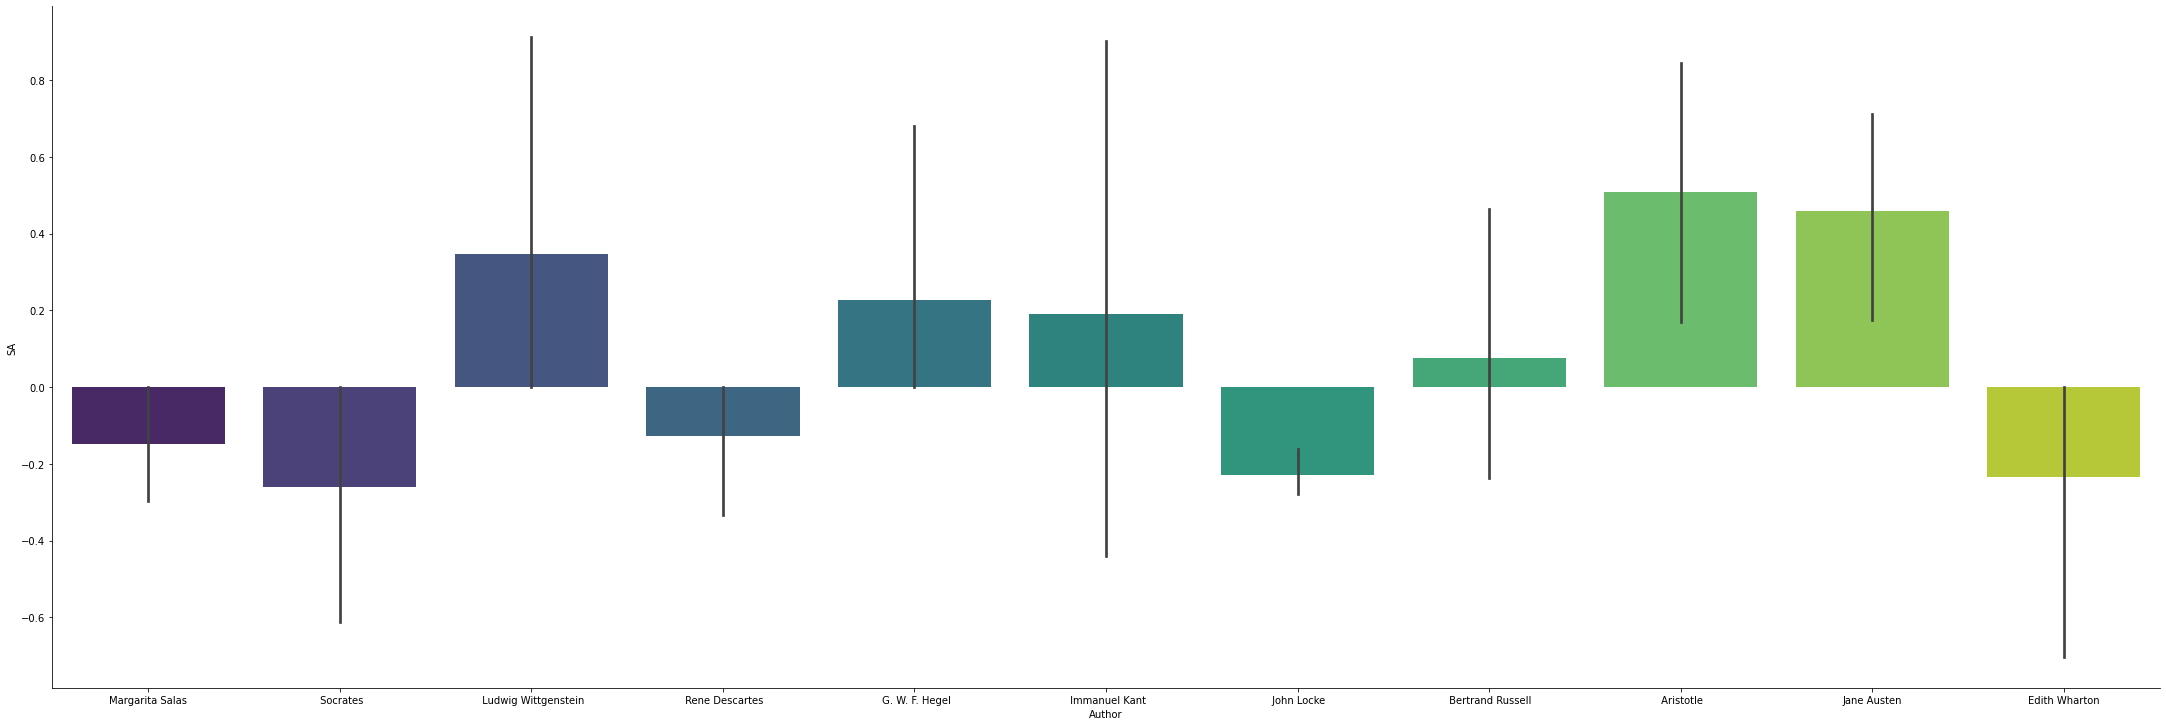

In [53]:
fig2 = sns.catplot(x="Author", y="SA",  kind="bar", palette = "viridis",size=10, aspect=3, data=df2_rep)

In [54]:
fig2.savefig("Sentimental_Analysis_MostPopular.png")